<a href="https://www.kaggle.com/code/himanshikawade04/gold-price-prediction?scriptVersionId=185508625" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/kaggle/input/gold-price-dataset/Gold_price_dataset.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


## Know about data


In [3]:
df.shape

(1718, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [6]:
df.isna().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [7]:
df.drop('Date',axis=1,inplace = True)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


## Standard Scaler & train-test-split

In [9]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score,train_test_split

In [10]:
X = df.drop('USO_Adj Close',axis=1)
y = df['USO_Adj Close']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume
670,118.580002,118.820000,118.349998,118.589996,118.589996,5174800,188.419998,189.820007,187.039993,187.699997,...,21.750000,21.230000,21.370001,20.711649,36062500,31.910000,31.92,30.629999,30.850000,15403700
798,114.830002,114.959999,113.769997,113.830002,113.830002,5696000,210.009995,210.850006,208.899994,210.630005,...,19.889999,19.309999,19.309999,18.838125,52298200,19.459999,19.66,19.260000,19.360001,17294700
1708,117.370003,118.029999,117.349998,117.870003,117.870003,8454900,259.399994,260.649994,253.529999,255.360001,...,20.650000,20.280001,20.610001,20.501528,67083000,10.890000,10.91,10.410000,10.450000,40129600
1175,120.900002,120.930000,120.550003,120.830002,120.830002,6707800,213.880005,214.080002,212.759995,213.979996,...,24.780001,24.400000,24.620001,24.224377,34304800,11.400000,11.50,11.330000,11.480000,39657300
1392,128.210007,128.300003,127.589996,127.970001,127.970001,9020000,246.539993,247.110001,246.300003,246.580002,...,25.480000,25.080000,25.240000,24.906208,49542200,9.990000,10.02,9.660000,9.730000,24078300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,128.889999,129.169998,128.580002,129.110001,129.110001,9500600,218.339996,218.899994,218.210007,218.860001,...,30.780001,30.320000,30.750000,30.255873,60204200,11.110000,11.34,11.110000,11.300000,58903400
1294,122.250000,122.260002,121.279999,121.730003,121.730003,8472700,234.520004,234.949997,233.179993,233.440002,...,24.070000,23.280001,23.389999,23.080673,111847200,11.030000,11.05,10.520000,10.620000,50463000
860,105.809998,106.320000,105.250000,105.370003,105.370003,10519800,212.429993,212.740005,211.389999,211.759995,...,14.530000,14.020000,14.120000,13.774951,90063100,16.840000,17.08,16.780001,16.910000,12817100
1459,119.099998,119.290001,118.709999,118.930000,118.930000,6993600,267.089996,267.220001,265.600006,265.660004,...,22.170000,21.799999,22.070000,21.778130,36365600,11.220000,11.43,11.210000,11.430000,9073200


In [13]:
X_test

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume
599,127.989998,128.119995,127.489998,127.699997,127.699997,8145900,196.199997,197.630005,196.130005,197.029999,...,26.650000,26.150000,26.240000,25.431620,37682400,39.02,39.119999,38.570000,38.860001,2373700
1348,116.580002,116.610001,116.239998,116.470001,116.470001,4443400,241.889999,242.029999,240.339996,240.550003,...,21.700001,21.440001,21.490000,21.205801,37409500,9.44,9.560000,9.290000,9.310000,41881900
115,157.259995,157.440002,156.160004,157.320007,157.320007,11462100,128.389999,128.740005,127.139999,128.100006,...,47.349998,45.860001,47.330002,44.980419,20460800,31.34,31.809999,31.230000,31.760000,11859500
135,154.669998,155.550003,154.339996,155.089996,155.089996,3654200,136.479996,136.649994,135.520004,136.509995,...,45.040001,44.380001,44.759998,42.537994,6302200,31.43,31.700001,30.820000,31.430000,17550700
339,133.169998,133.479996,131.020004,131.070007,131.070007,20346500,165.949997,167.039993,165.729996,166.940002,...,27.190001,26.360001,26.379999,25.329441,23628300,34.23,34.290001,33.860001,34.209999,5677900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,113.419998,113.510002,112.349998,112.610001,112.610001,5345900,221.100006,221.559998,221.009995,221.520004,...,20.860001,20.440001,20.610001,20.278814,34433900,10.50,10.550000,10.280000,10.330000,29733900
107,153.589996,154.419998,151.550003,152.080002,152.080002,11302700,132.309998,133.229996,131.339996,132.199997,...,43.759998,42.200001,42.540001,40.428200,20767800,34.91,35.000000,34.389999,34.480000,5284200
1007,116.680000,117.419998,116.519997,117.220001,117.220001,9033400,194.000000,194.320007,192.179993,192.320007,...,19.059999,18.650000,18.920000,18.615971,73296800,8.76,8.760000,8.430000,8.480000,62427200
1699,116.599998,116.769997,116.300003,116.410004,116.410004,8469500,280.279999,280.399994,277.510010,279.299988,...,19.490000,19.160000,19.440001,19.337685,47882800,11.27,11.270000,11.020000,11.270000,32582300


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled

array([[-0.49461998, -0.50784706, -0.47988787, ...,  0.78610499,
         0.78344964, -0.25436963],
       [-0.70930228, -0.7274158 , -0.74374001, ..., -0.21757693,
        -0.22530334, -0.13315542],
       [-0.56389075, -0.55278475, -0.53749749, ..., -0.99880699,
        -1.00754797,  1.33057499],
       ...,
       [-1.22568499, -1.21888553, -1.23457384, ..., -0.43649781,
        -0.44039873, -0.4201722 ],
       [-0.46485093, -0.48111196, -0.45914835, ..., -0.92818732,
        -0.92150985, -0.66015837],
       [ 0.07958354,  0.08203056,  0.0460883 , ..., -1.04735801,
        -1.02861853,  0.77271402]])

In [16]:
X_test_scaled

array([[ 0.04408923,  0.02116527,  0.0466641 , ...,  1.48700527,
         1.48667967, -1.08960023],
       [-0.60911721, -0.63355861, -0.60144418, ..., -1.09767452,
        -1.10763313,  1.44289845],
       [ 1.71975595,  1.6889775 ,  1.6983324 , ...,  0.83906983,
         0.86334218, -0.48155492],
       ...,
       [-0.60339246, -0.58748349, -0.58531354, ..., -1.17359066,
        -1.18050215,  2.75986417],
       [-0.60797246, -0.62445754, -0.59798731, ..., -0.94495949,
        -0.93555689,  0.84678866],
       [-0.47114828, -0.47940553, -0.45453946, ..., -1.06589567,
        -1.06373613,  0.52838183]])

## Model Building

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [18]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
y_preds_lr = lr.predict(X_test_scaled)
print('MAE: ',mean_absolute_error(y_test,y_preds_lr))
print('MSE: ',mean_squared_error(y_test,y_preds_lr))
print('R2Score: ',r2_score(y_test,y_preds_lr)*100)

MAE:  3.569496119870416e-14
MSE:  1.7900194151590165e-27
R2Score:  100.0


## Visualization

In [19]:
import matplotlib.pyplot as plt

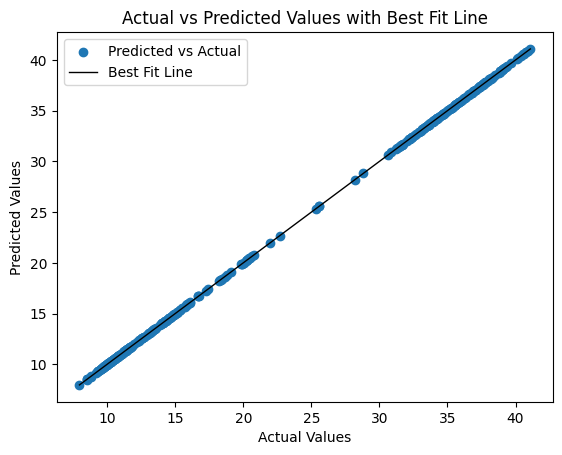

In [20]:
plt.scatter(y_test, y_preds_lr, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=1, label='Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line')
plt.legend()
plt.show()